In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os

In [11]:
img_size = (200, 200)
batch_size = 50

train_dataset_path = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"

if not os.path.exists(train_dataset_path):
    raise FileNotFoundError(f"Dataset path '{train_dataset_path}' not found!")

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2  # 10% for validation
)

In [13]:

train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=img_size,
    batch_size=batch_size,  # Consistent batch size
    class_mode='categorical',
    subset='validation'
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [14]:
model = Sequential([
    Input(shape=(200, 200, 3)),
    Conv2D(64, (7, 7), activation='relu', padding="same"),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    Conv2D(128, (5, 5), activation='relu', padding="same"),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    Conv2D(256, (3, 3), activation='relu', padding="same"),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    Flatten(),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(29, activation='softmax')  # 29 output classes
])

In [15]:
optimizer = Adam(learning_rate=0.0001)  # Custom learning rate
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 200, 200, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 100, 100, 128)       │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 50, 50, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 160000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 160000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      20,480,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 29)                  │             957 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,000,989 (80.11 MB)

 Trainable params: 21,000,989 (80.11 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(
    train_generator,
    epochs=12,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=1  # Enable detailed logs
)

Epoch 1/12
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 973s 689ms/step - accuracy: 0.1051 - loss: 3.1429 - val_accuracy: 0.2336 - val_loss: 2.5197
Epoch 2/12
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 954s 683ms/step - accuracy: 0.4028 - loss: 1.9252 - val_accuracy: 0.3889 - val_loss: 1.9544
Epoch 3/12
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 956s 684ms/step - accuracy: 0.5626 - loss: 1.3712 - val_accuracy: 0.4614 - val_loss: 1.7375
Epoch 4/12
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 955s 683ms/step - accuracy: 0.6556 - loss: 1.0687 - val_accuracy: 0.4893 - val_loss: 1.6198
Epoch 5/12
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 962s 688ms/step - accuracy: 0.7197 - loss: 0.8546 - val_accuracy: 0.5472 - val_loss: 1.4760
Epoch 6/12
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 959s 686ms/step - accuracy: 0.7643 - loss: 0.7204 - val_accuracy: 0.5980 - val_loss: 1.3041
Epoch 7/12
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 990s 708ms/step - accuracy: 0.8027 - loss: 0.6041 - val_accuracy: 0.6261 - val_loss: 1.1795
Epoch 8/12
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 983s 704ms/step - ac

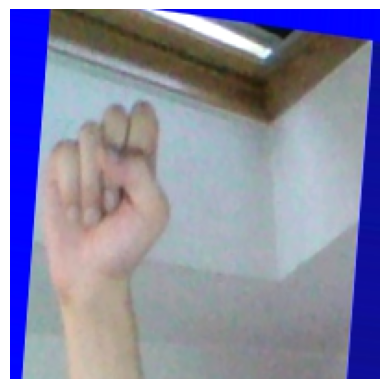

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Class: S


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random  

batch_index = random.randint(0, len(validation_generator) - 1)  
images, labels = validation_generator[batch_index] 

image_index = random.randint(0, len(images) - 1) 
random_image = images[image_index]

plt.imshow(random_image)
plt.axis('off')
plt.show()

predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

class_indices = validation_generator.class_indices 
index_to_class = {v: k for k, v in class_indices.items()} 
predicted_class_name = index_to_class[predicted_classes[image_index]]

print(f"Predicted Class: {predicted_class_name}")

In [26]:
model.save('asl_detection_model.h5')  